In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as ticker
from PIL import Image
import seaborn as sns; 
sns.set_style("whitegrid")

#%matplotlib inline

In [2]:
_METRICS_FILE = './files/benchmark_pool'
_METRIC = 'kappa'
_CLASSIFIER = 'keras_parallel_3_Dilated_Conv'

datasets_to_remove = ['bankmarketingnorm', 'airlinesnorm']
datasets_to_remove += ['breast', 'carnorm', 'covtype', 'electricity', 'higgs200k', 'kddcup99norm', 'ozone', 'pendigitis', 'pokerhand', 'spambase', 'susy100k']
classifiers_to_remove = ['keras_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv']

In [3]:
# read data
metrics = pd.read_csv(_METRICS_FILE+'.csv')

# Delete datasets and classifier that we dont want
metrics = metrics[~metrics.classifier.isin(classifiers_to_remove)]
metrics = metrics[metrics.classifier.isin(['MOA_ASHoeffdingTree', 'MOA_HoeffdingOptionTree', 'MOA_HoeffdingTree', 'MOA_LeveragingBag', 'MOA_OzaBagAdwin', 'MOA_OzaBoostAdwin', 'MOA_SingleClassifierDrift', 'keras_parallel_3_Dilated_Conv_pooling', 'sklearn_MLPClassifier', 'sklearn_SGDClassifier'])]
metrics = metrics[~metrics.dataset.isin(datasets_to_remove)]

metrics = metrics[metrics['instances']>1000]

print(len(metrics.dataset.unique()), "datasets")
metrics.sample(10)

29 datasets


,dataset,classifier,instances,attributes,classes,accuracy,kappa,train_time_mean,test_time_mean,total_time_mean,train_time,test_time,total_time
2197,UWaveGestureLibraryZ,MOA_LeveragingBag,4478,315,8,0.587880,0.507329,0.049160,0.017069,0.066229,22.023607,7.647078,29.670685
1747,ShapesAll,MOA_LeveragingBag,1200,512,60,0.527086,0.499089,0.610525,0.256593,0.867118,73.263012,30.791183,104.054195
2184,UWaveGestureLibraryY,keras_parallel_3_Dilated_Conv_pooling,4468,315,8,0.747792,0.690812,0.032517,0.013199,0.045716,14.534893,5.899997,14.534893
596,ElectricDevices,sklearn_MLPClassifier,16627,96,7,0.630053,0.526164,0.000793,0.000157,0.000950,1.318995,0.260899,1.579895
217,ChlorineConcentration,MOA_LeveragingBag,4307,166,3,0.578954,0.062581,0.006699,0.000090,0.006789,2.887089,0.038803,2.925893
1470,PhalangesOutlinesCorrect,MOA_ASHoeffdingTree,2658,80,2,0.651073,0.133000,0.000146,0.000077,0.000222,0.038751,0.020377,0.059128
1213,MedicalImages,MOA_OzaBagAdwin,1141,99,10,0.516670,0.020496,0.004228,0.000024,0.004252,0.486229,0.002807,0.489036
2180,UWaveGestureLibraryY,MOA_SingleClassifierDrift,4478,315,8,0.555232,0.468779,0.001461,0.001343,0.002804,0.654404,0.601686,1.256090
1020,ItalyPowerDemand,MOA_ASHoeffdingTree,1096,24,2,0.959945,0.915640,0.000086,0.000006,0.000092,0.009451,0.000662,0.010113
2107,TwoPatterns,MOA_LeveragingBag,5000,128,4,0.549993,0.380146,0.010421,0.002668,0.013090,5.210720,1.334231,6.544951


In [4]:
metrics_table = metrics.pivot(index='dataset',columns='classifier')[_METRIC]
metrics_table = metrics_table.dropna()
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
metrics_table = metrics_table.sort_values(by=list(metrics_table.columns), ascending=False)
metrics_table = metrics_table[metrics_table.columns[0:]]
limits = (min(metrics_table.min().min()-0.05, -0.1), max(metrics_table.max().max()+0.05, 1.1))
print(limits)

metrics_table

(-0.13428733419035083, 1.1)


classifier,keras_parallel_3_Dilated_Conv_pooling,sklearn_MLPClassifier,MOA_SingleClassifierDrift,MOA_HoeffdingTree,MOA_ASHoeffdingTree,MOA_HoeffdingOptionTree,MOA_LeveragingBag,MOA_OzaBoostAdwin,MOA_OzaBagAdwin,sklearn_SGDClassifier
dataset,,,,,,,,,,
TwoPatterns,0.999947,0.831768,0.289709,0.289709,0.289709,0.289709,0.380146,0.304429,0.281870,0.614509
CinCECGtorso,0.982306,0.981750,0.237493,0.233757,0.233757,0.233757,0.225028,0.000000,0.236487,0.221763
TwoLeadECG,0.980299,0.642916,0.545044,0.544061,0.544061,0.544061,0.536781,0.857928,0.535691,0.559434
Wafer,0.970155,0.990666,0.191710,0.356147,0.356147,0.341560,0.963474,0.959682,0.552848,0.542139
FacesUCR,0.967146,0.722795,0.841938,0.777421,0.777421,0.777421,0.860715,0.873506,0.799821,0.635126
Mallat,0.964654,0.910839,0.931191,0.931191,0.931191,0.931191,0.204766,0.216491,0.194314,0.786734
FaceAll,0.959695,0.728645,0.829490,0.735665,0.735665,0.735665,0.849261,0.868891,0.797057,0.637699
Symbols,0.951277,0.830711,0.889887,0.888874,0.888874,0.888874,0.887084,0.890289,0.878594,0.709223
ItalyPowerDemand,0.922495,0.897980,0.777878,0.915640,0.915640,0.915640,0.931874,0.917863,0.919985,0.836083


In [5]:
metrics_table = metrics_table.reindex(metrics_table.mean().sort_values(ascending=False).index, axis=1)
list(metrics_table.columns)
metrics_table.mean()

classifier
keras_parallel_3_Dilated_Conv_pooling    0.776488
sklearn_MLPClassifier                    0.567628
MOA_SingleClassifierDrift                0.485763
MOA_ASHoeffdingTree                      0.479961
MOA_HoeffdingTree                        0.479961
MOA_HoeffdingOptionTree                  0.479440
MOA_LeveragingBag                        0.454351
MOA_OzaBoostAdwin                        0.428401
MOA_OzaBagAdwin                          0.400692
sklearn_SGDClassifier                    0.385931
dtype: float64

In [6]:
classifiers = list(metrics_table.columns)
classifier_labels = [n.replace('_',' - ') if 'keras' not in n else 'keras - CNN' for n in classifiers]
classifier_labels = "keras CNN, MLP, Single classifier drift, AS Hoeffding tree, Hoeffding tree, Hoeffding option tree, Leveraging bag, Oza Boost Adwin, Oza Bag Adwin, SGD".split(", ") 

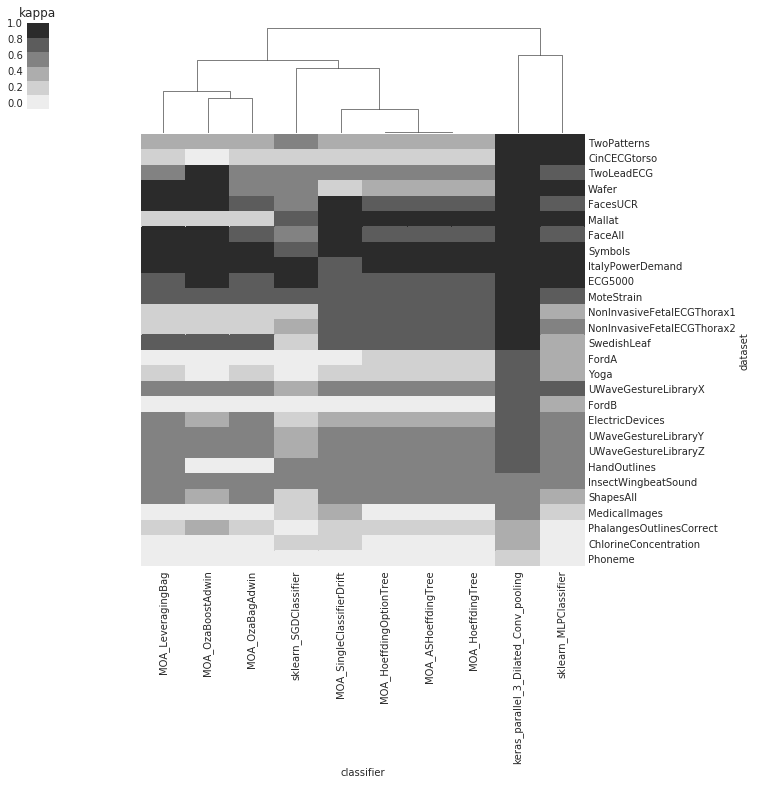

In [7]:
#sns.color_palette("BuGn")
#sns.cm.rocket_r
#sns.palplot(sns.cubehelix_palette(8, start=2, rot=0, dark=0, light=.95, reverse=True))
with plt.style.context('seaborn-whitegrid'):
    cm = sns.clustermap(metrics_table, figsize=(10,10), cmap=sns.color_palette("Greys"), annot=False, linewidth=0.0, row_cluster=False)
    cm.cax.yaxis.tick_left()
    cm.cax.yaxis.set_label_position("left")
    #cm.cax.set_visible(False)
    cm.cax.set_title(_METRIC)

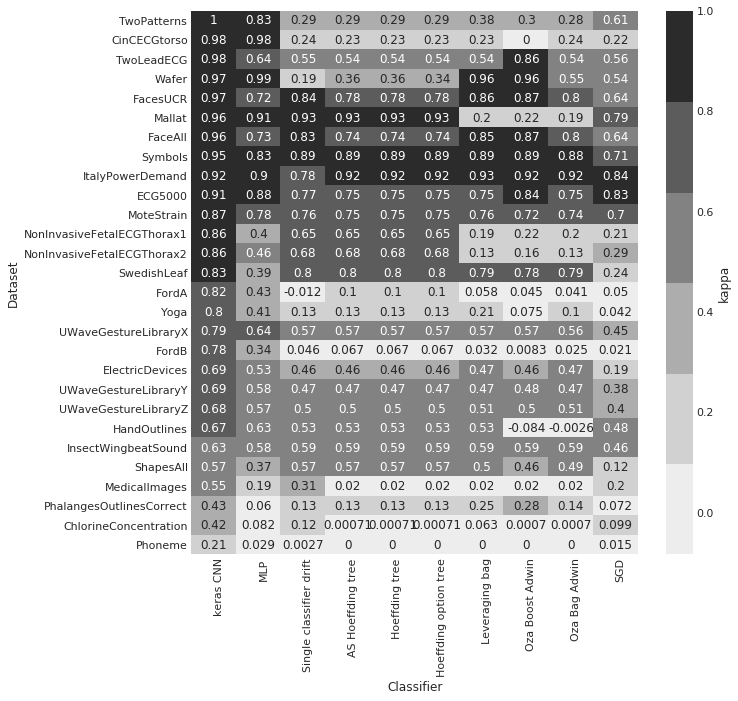

In [8]:
sns.set(font_scale=1.0)
with plt.style.context('seaborn-whitegrid'):
    fig,ax = plt.subplots(figsize=(10,10))
    sns.heatmap(metrics_table, cmap=sns.color_palette("Greys"), annot=True, linewidth=0.0, ax=ax, cbar_kws={'label': 'kappa'})
    ax.set_xticklabels(classifier_labels, rotation=90, ha="right", rotation_mode="anchor")
    ax.set_xlabel("Classifier")
    ax.set_ylabel("Dataset")
#plt.savefig("files/plots/heatmap.png")
    

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804)]

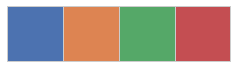

In [9]:
with plt.style.context('seaborn-whitegrid'):
    sns.palplot(sns.color_palette(n_colors=4))
sns.color_palette(n_colors=4)

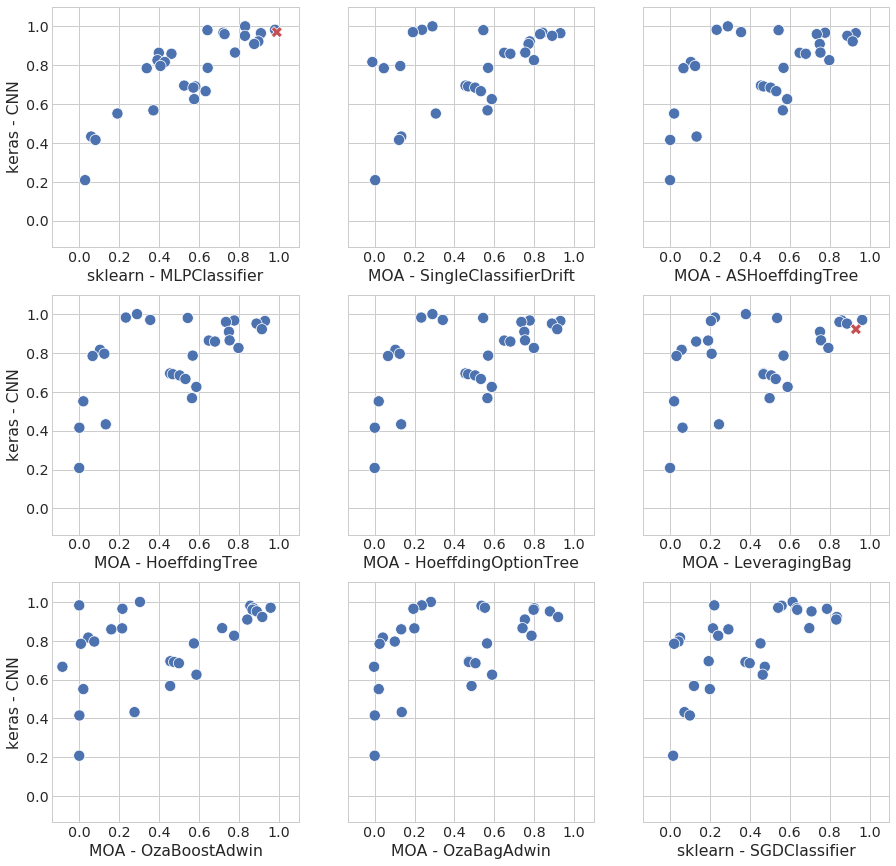

In [54]:
sns.set(font_scale=1.3)

clf_name = 'keras_parallel_3_Dilated_Conv_pooling'
classifiers = metrics_table.columns[~metrics_table.columns.isin(['keras_parallel_3_Dilated_Conv', 'keras_parallel_3_Dilated_Conv_pooling'])]
metrics_table['size'] = metrics.pivot(index='dataset', columns = 'classifier', values='instances')[clf_name]

#pal = {True:(0.12156862745098039, 0.4666666666666667, 0.7058823529411765) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)}
#pal = {True:(0.17254901960784313, 0.6274509803921569, 0.17254901960784313) , False:(0.8392156862745098, 0.15294117647058825, 0.1568627450980392)} 
pal = {True:(0.2980392156862745, 0.4470588235294118, 0.6901960784313725), False:(0.7686274509803922, 0.3058823529411765, 0.3215686274509804)}

with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(3,3, figsize=(15,15))

    for i in range(3):
        for j in range(3):

            clf = classifiers[i*3+j]
            metrics_table['diff'] = ((metrics_table[clf_name]-metrics_table[clf])>0)


            #sns.lineplot(x=[-1,2], y=[-1,2], ax=ax[i][j], dashes=True, color='white')
            #ax[i][j].lines[0].set_linestyle("--")
            sns.scatterplot(y=metrics_table[clf_name], x=metrics_table[clf], palette=pal, ax=ax[i][j],hue=metrics_table['diff'], legend=False, style = ~metrics_table['diff'], s=125 )#, size=metrics_table['size'])

            count_ls = [metrics_table[metrics_table['diff']]['diff'].count(),metrics_table[~metrics_table['diff']]['diff'].count()]
            
            #patches, autotexts = ax[i][j].pie(count_ls,labeldistance=0.5, colors = ((*pal[True],0.9),(*pal[False],0.9)), frame=True, center=(0.9,0.0), radius=0.1)
            #autotexts[0].set_color('white')
            #autotexts[1].set_color('white')
            

            ax[i][j].set_ylabel('keras - CNN')
            ax[i][j].set_xlabel(clf.replace('_',' - '))
            ax[i][j].set_xlim(limits)
            ax[i][j].set_ylim(limits)
            if i != 2:
                pass
                #ax[i][j].set_xticklabels([])
            if j != 0:
                ax[i][j].set_ylabel('')
                ax[i][j].set_yticklabels([])

#plt.savefig('files/plots/scatter.png', dpi=fig.dpi)
del metrics_table['size'], metrics_table['diff']         
sns.set(font_scale=1)

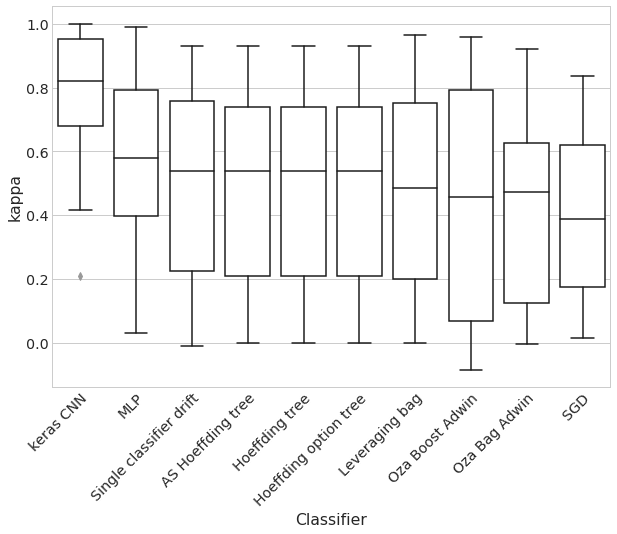

In [11]:
sns.set(font_scale=1.3)
with plt.style.context('seaborn-whitegrid'):
    fig, ax = plt.subplots(figsize=(10,7))
    sns.boxplot(data=metrics_table,  ax=ax, color='white')
    ax.set_ylabel('kappa')
    ax.set_xticklabels(classifier_labels, rotation=45, ha="right", rotation_mode="anchor")
    ax.set_xlabel('Classifier')
    plt.setp(ax.artists, edgecolor = 'k', facecolor='w')
    plt.setp(ax.lines, color='k')

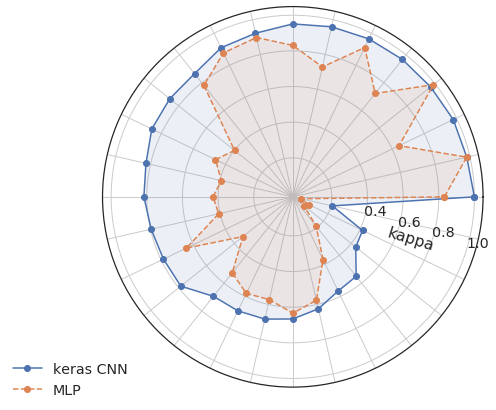

In [58]:
datasets = list(metrics_table.index)
angles=np.linspace(0, 2*np.pi, len(datasets), endpoint=False)
angles=np.concatenate((angles,[angles[0]]))

styles = ['o-', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--', 'o--']


sns.set(font_scale=1.3)
with plt.style.context('seaborn-white'):
    fig= plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, polar=True)
    # close the plot
    for e,clf in enumerate(metrics_table.columns):
        stats=metrics_table[clf].values
        stats=np.concatenate((stats,[stats[0]]))
        ax.plot(angles, stats, styles[e], label=classifier_labels[e])
        ax.fill(angles, stats, alpha=0.1)
        if e==1:
            break

    ax.set_thetagrids(angles * 180/np.pi, ['' if i%2==1 else '' for i in range(len(datasets))])
    
    ax.set_yticklabels(["{0:.1f}".format(t) if t>0.3 else '' for i,t in enumerate(list(ax.get_yticks()))])
    ax.set_rlabel_position(-17)
    label_position=ax.get_rlabel_position()
    ax.text(np.radians(label_position),ax.get_rmax()/2.,'kappa',
            rotation=label_position,ha='left',va='top')
    
    handles, labels = ax.get_legend_handles_labels()

    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))    
    #ax.set_title("kappa")
    #ax.grid(True)



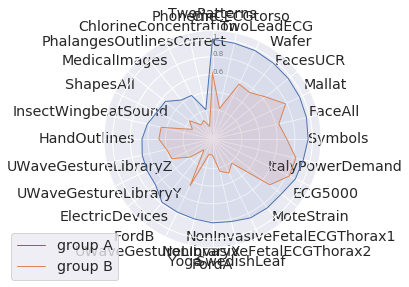

In [48]:
from math import pi
# Set data
 
 
 
# ------- PART 1: Create background
 
# number of variable
categories=list(metrics_table.index)
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([-0.1,0.2,0.4,0.6,0.8,1], ["","","","0.6","0.8","1"], color="grey", size=7)
plt.ylim(limits)
 
 
# ------- PART 2: Add plots
 
# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
 
# Ind1
values=metrics_table['keras_parallel_3_Dilated_Conv_pooling'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group A")
ax.fill(angles, values, 'b', alpha=0.1)
 
# Ind2
values=metrics_table['sklearn_SGDClassifier'].values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label="group B")
ax.fill(angles, values, 'r', alpha=0.1)
 
# Add legend
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))